In [324]:
# print timestamp
import time
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

2023-11-23 13:34:36


# Data Mining: Preparing the Data

## Data Preprocessing
- **Professor**: Prof.Dr. Songül Varlı
- **Department**: Department of Computer Engineering
- **University**: Yildiz Technical University
- **Contact**: svarli@yildiz.edu.tr

## Chapter Objectives
- Analyze basic representations and characteristics of raw and large data sets.
- Apply different normalization techniques on numerical attributes.
- Recognize different techniques for data preparation, including attribute transformation.
- Compare different methods for elimination of missing values.
- Construct a method for uniform representation of time-dependent data.
- Compare different methods for outlier detection.

## Representation of Raw Data
- Data samples introduced as rows in table below are basic components in a data mining process.
- Every sample is described with several features and there are different types of values for every feature.

### Numeric Data
- Numeric values include real-value variables or integer variables such as age, speed, or length.
- A feature with numeric values has two important properties: 
  - its values have an order relation (2 < 5 and 5 < 7) and 
  - a distance relation (d(2.3, 4.2) = 1.9).

### Categoric Data
- Categorical (often called symbolic) variables have neither of these two relations.
- A categorical variable with two values can be converted to a numeric binary variable with two values: 0 or 1.
- A categorical variable with N values can be converted into N binary numeric variables, known as "dummy variables" in statistics.

### Continuous Variables
- Continuous variables are measured using either an interval scale or a ratio scale.
- Both scales allow the underlying variable to be defined or measured theoretically with infinite precision.

### Discrete Variables
- Discrete variables are measured using nominal or ordinal scales.
- An ordinal variable is a categorical variable for which an order relation is defined but not a distance relation.

## Characteristics of Raw Data
- Raw data sets prepared for data mining are often large and related to human beings.
- Expect to find missing values, distortions, misrecording, inadequate sampling, etc. in these initial data sets.

## Transformation of Raw Data

### Normalizations
- Some data-mining methods may need normalized data for best results.
- Three simple and effective normalization techniques are:
    1. Decimal Scaling
    2. Min-max Normalization
    3. Standard deviation normalization


In [325]:
import pandas as pd

names = ['Ava', 'Xiao', 'Evelyn', 'Sophia', 'James', 'Michael', 'Joshua', 'Henry', 'Jayden', 'Isabella', 'William', 'Alexander', 'Emily', 'Jackson', 'Avery', 'Harper', 'Andrew', 'Victoria', 'Matthew', 'Adam', 'Elizabeth', 'Jacob', 'Emma', 'Sofia', 'Chloe', 'Mia', 'Samuel', 'Jack', 'John', 'Abigail', 'Amelia', 'Christopher', 'Ella', 'Luke', 'David', 'Penelope', 'Ethan', 'Scarlett', 'Daniel', 'Grace', 'Joseph', 'Ryan', 'Sebastian', 'Olivia', 'Jason', 'Varun', 'Benjamin', 'Charlotte', 'Aubrey', 'Ray']
ages = [47, 43, 40, 32, 28, 57, 54, 77, 53, 69, 33, 65, 49, 65, None, 24, 72, 51, 25, 27, 68, 18, 52, 20, 38, 56, 58, 66, None, 65, 23, 43, 47, 22, 76, 50, 73, 50, 23, 39, 31, 63, None, 46, 49, 116, 116, 113, 105, 115]
incomes = [None, 75000, 65000, 45000, 70000, 60000, 80000, 90000, 95000, None, 85000, 100000, 110000, 105000, 120000, None, 130000, 125000, 140000, 135000, 150000, 145000, 160000, 155000, 170000, 165000, 180000, 175000, 190000, 185000, 200000, 195000, 210000, 205000, 220000, 215000, 230000, 225000, 240000, 235000, 250000, 245000, 260000, 255000, 270000, 265000, 280000, 275000, 290000, 285000]
heights = [210, 216, 171, 214, 57, 189, 168, 185, 155, 211, 200, 154, 200, 99, 187, 85, 196, 213, 175, 213, 214, 5, 181, 211, 166, 161, 151, 212, 219, 185, 176, 211, 164, 152, 176, 292, 316, 183, 207, 21, 211, 211, 182, 168, 217, 199, 212, 152, 159, 154]
weights = [83, 129, 92, 107, 22, 132, 196, 187, 181, 110, 186, 140, None, 145, 142, 175, None, None, 137, 90, 66, 184, 118, 10, None, 69, None, 144, 145, 3, None, None, 16, 133, 181, 18, 26, None, 118, 120, 13, 75, None, None, 118, 134, 18, 107, 181, 104]
genders = ['F', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M']

sample_data = { 'name': names, 'age':ages, 'income': incomes, 'height': heights, 'weight': weights, 'genders': genders}

# create a dataframe with sample data
df = pd.DataFrame(sample_data)

df.head(10)

,name,age,income,height,weight,genders
0,Ava,47.0,NaN,210,83.0,F
1,Xiao,43.0,75000.0,216,129.0,M
2,Evelyn,40.0,65000.0,171,92.0,F
3,Sophia,32.0,45000.0,214,107.0,F
4,James,28.0,70000.0,57,22.0,M
5,Michael,57.0,60000.0,189,132.0,M
6,Joshua,54.0,80000.0,168,196.0,M
7,Henry,77.0,90000.0,185,187.0,M
8,Jayden,53.0,95000.0,155,181.0,M
9,Isabella,69.0,NaN,211,110.0,F


#### Decimal Scaling
- Decimal scaling is a simple technique for normalization of numeric values.
- The idea is to move the decimal point of values of an attribute x to the left or right by a number of positions equal to the smallest integer q such that max(|x|) < 1.
- The new value of x is denoted as x' and is given by the following formula:
$$x' = \frac{x}{10^q}$$

In [326]:
# Decimal Scaling
max_income = df['income'].max()
q = len(str(int(max_income))) - 1

df['income_scaled'] = df['income'] / (10 ** q)
df.head(10)

,name,age,income,height,weight,genders,income_scaled
0,Ava,47.0,NaN,210,83.0,F,NaN
1,Xiao,43.0,75000.0,216,129.0,M,0.75
2,Evelyn,40.0,65000.0,171,92.0,F,0.65
3,Sophia,32.0,45000.0,214,107.0,F,0.45
4,James,28.0,70000.0,57,22.0,M,0.70
5,Michael,57.0,60000.0,189,132.0,M,0.60
6,Joshua,54.0,80000.0,168,196.0,M,0.80
7,Henry,77.0,90000.0,185,187.0,M,0.90
8,Jayden,53.0,95000.0,155,181.0,M,0.95
9,Isabella,69.0,NaN,211,110.0,F,NaN


#### Min-max Normalization
- Min-max normalization is a simple technique for normalization of numeric values.
- The idea is to map the values of an attribute x to a new range [a, b].
- The new value of x is denoted as x' and is given by the following formula:
$$x' = a + \frac{(x - min(x))(b - a)}{max(x) - min(x)}$$

In [327]:
# Min-max normalization on 'age' column
min_age = df['income'].min()
print("min_income: ", min_age)
max_age = df['income'].max()
print("max_income: ", max_age)

a = 0
b = 100

df['income_normalized'] = round(a + (df['income'] - min_age) * (b - a) / (max_age - min_age), 2)
df.head(10)


min_income:  45000.0
max_income:  290000.0


,name,age,income,height,weight,genders,income_scaled,income_normalized
0,Ava,47.0,NaN,210,83.0,F,NaN,NaN
1,Xiao,43.0,75000.0,216,129.0,M,0.75,12.24
2,Evelyn,40.0,65000.0,171,92.0,F,0.65,8.16
3,Sophia,32.0,45000.0,214,107.0,F,0.45,0.00
4,James,28.0,70000.0,57,22.0,M,0.70,10.20
5,Michael,57.0,60000.0,189,132.0,M,0.60,6.12
6,Joshua,54.0,80000.0,168,196.0,M,0.80,14.29
7,Henry,77.0,90000.0,185,187.0,M,0.90,18.37
8,Jayden,53.0,95000.0,155,181.0,M,0.95,20.41
9,Isabella,69.0,NaN,211,110.0,F,NaN,NaN


#### Standard Deviation Normalization
- Standard deviation normalization is a simple technique for normalization of numeric values.
- The idea is to map the values of an attribute x to a new range [a, b].
- The new value of x is denoted as x' and is given by the following formula:
$$x' = a + \frac{(x - \mu)(b - a)}{\sigma}$$
where $\mu$ and $\sigma$ are the mean and standard deviation of x, respectively.

In [328]:
# calculate mean step by step
sum_income = 0
income_list = df['income'].to_list()
for i in range(len(df)):
    if income_list[i] > 0:
        sum_income += income_list[i]
print("sum_income: ", sum_income)
mean_income = sum_income / len(df)
print("mean_income: ", mean_income)
# calculate standard deviation step by step
# 1 Find each score’s deviation from the mean
# 2 Square each deviation
# 3 Sum the squared deviations
# 4 Divide the sum of the squared deviations by the number of scores and this will give you the variance
# 5 Take the square root of the result from step 4

deviations = []
for i in range(len(df)):
    if income_list[i] > 0:
        deviations.append(income_list[i] - mean_income)
    else:
        deviations.append(0)
print("deviations: ", deviations)

squared_deviations = []
for i in range(len(deviations)):
    squared_deviations.append(deviations[i] ** 2)

sum_squared_deviations = 0
for i in range(len(squared_deviations)):
    sum_squared_deviations += squared_deviations[i]

variance = sum_squared_deviations / len(df)
print("variance: ", variance)

standard_deviation = round(variance ** 0.5, 2)
print("standard_deviation: ", standard_deviation)

a = 100
b = 200

df['income_standardized'] = round(a + (df['income'] - mean_income) * (b - a) / standard_deviation, 2)
df.head(10)

sum_income:  8155000.0
mean_income:  163100.0
deviations:  [0, -88100.0, -98100.0, -118100.0, -93100.0, -103100.0, -83100.0, -73100.0, -68100.0, 0, -78100.0, -63100.0, -53100.0, -58100.0, -43100.0, 0, -33100.0, -38100.0, -23100.0, -28100.0, -13100.0, -18100.0, -3100.0, -8100.0, 6900.0, 1900.0, 16900.0, 11900.0, 26900.0, 21900.0, 36900.0, 31900.0, 46900.0, 41900.0, 56900.0, 51900.0, 66900.0, 61900.0, 76900.0, 71900.0, 86900.0, 81900.0, 96900.0, 91900.0, 106900.0, 101900.0, 116900.0, 111900.0, 126900.0, 121900.0]
variance:  4689793400.0
standard_deviation:  68482.07


,name,age,income,height,weight,genders,income_scaled,income_normalized,income_standardized
0,Ava,47.0,NaN,210,83.0,F,NaN,NaN,NaN
1,Xiao,43.0,75000.0,216,129.0,M,0.75,12.24,-28.65
2,Evelyn,40.0,65000.0,171,92.0,F,0.65,8.16,-43.25
3,Sophia,32.0,45000.0,214,107.0,F,0.45,0.00,-72.45
4,James,28.0,70000.0,57,22.0,M,0.70,10.20,-35.95
5,Michael,57.0,60000.0,189,132.0,M,0.60,6.12,-50.55
6,Joshua,54.0,80000.0,168,196.0,M,0.80,14.29,-21.35
7,Henry,77.0,90000.0,185,187.0,M,0.90,18.37,-6.74
8,Jayden,53.0,95000.0,155,181.0,M,0.95,20.41,0.56
9,Isabella,69.0,NaN,211,110.0,F,NaN,NaN,NaN


### Data Smoothing
- A numeric feature, y, may range over many distinct values, sometimes as many as the number of training cases.
- Many simple smoothers can be specified that average similar measured values.
- Smoothing is often used to remove noise from data. There are several smoothing techniques:
    1. Binning
    2. Regression
    3. Clustering
    4. Combined computer and human inspection

In [329]:
""" 
Equal-width (distance) partitioning
■ Divides the range into N intervals of equal size: uniform grid
■ if A and B are the lowest and highest values of the attribute, the width of intervals will be: W = (B – A) / N.
"""

bins = []

sorted_age = df['age'].sort_values().to_list()

# Equal-width (distance) partitioning on 'age' column
min_age = sorted_age[0]
print("min_age: ", min_age)
last_nan_index = 1
max_age = sorted_age[len(sorted_age) - last_nan_index]
while max_age != max_age:
    last_nan_index += 1
    max_age = sorted_age[len(sorted_age) - last_nan_index]
print("max_age: ", max_age)
N = 3
W = round((max_age - min_age) / N, 1)
print("W: ", W)

bins = []
for i in range(N):
    bin = []
    min_age_of_bin = min_age + i * W
    max_age_of_bin = min_age + (i + 1) * W
    for j in range(len(sorted_age)):
        if sorted_age[j] >= min_age_of_bin and sorted_age[j] < max_age_of_bin:
            bin.append(sorted_age[j])
    bins.append(bin)
    print("bin ", i, "min: ", round(min_age_of_bin), "max: ", round(max_age_of_bin), "bin: ", bin)

min_age:  18.0
max_age:  116.0
W:  32.7
bin  0 min:  18 max:  51 bin:  [18.0, 20.0, 22.0, 23.0, 23.0, 24.0, 25.0, 27.0, 28.0, 31.0, 32.0, 33.0, 38.0, 39.0, 40.0, 43.0, 43.0, 46.0, 47.0, 47.0, 49.0, 49.0, 50.0, 50.0]
bin  1 min:  51 max:  83 bin:  [51.0, 52.0, 53.0, 54.0, 56.0, 57.0, 58.0, 63.0, 65.0, 65.0, 65.0, 66.0, 68.0, 69.0, 72.0, 73.0, 76.0, 77.0]
bin  2 min:  83 max:  116 bin:  [105.0, 113.0, 115.0, 116.0, 116.0]


In [330]:
# Smoothing by bin means
bin_means = []
for i in range(len(bins)):
    bin_means.append(round(sum(bins[i]) / len(bins[i]), 2))
print("bin_means: ", bin_means)

# Replace each value in the interval by the mean of its bin to remove the effect of outliers
df['age_ewp_binned_means'] = df['age']
for i in range(len(bins)):
    for j in range(len(bins[i])):
        df['age_ewp_binned_means'] = df['age_ewp_binned_means'].replace(bins[i][j], bin_means[i])
df.head(10)

bin_means:  [35.29, 63.33, 113.0]


,name,age,income,height,weight,genders,income_scaled,income_normalized,income_standardized,age_ewp_binned_means
0,Ava,47.0,NaN,210,83.0,F,NaN,NaN,NaN,35.29
1,Xiao,43.0,75000.0,216,129.0,M,0.75,12.24,-28.65,35.29
2,Evelyn,40.0,65000.0,171,92.0,F,0.65,8.16,-43.25,35.29
3,Sophia,32.0,45000.0,214,107.0,F,0.45,0.00,-72.45,35.29
4,James,28.0,70000.0,57,22.0,M,0.70,10.20,-35.95,35.29
5,Michael,57.0,60000.0,189,132.0,M,0.60,6.12,-50.55,63.33
6,Joshua,54.0,80000.0,168,196.0,M,0.80,14.29,-21.35,63.33
7,Henry,77.0,90000.0,185,187.0,M,0.90,18.37,-6.74,63.33
8,Jayden,53.0,95000.0,155,181.0,M,0.95,20.41,0.56,63.33
9,Isabella,69.0,NaN,211,110.0,F,NaN,NaN,NaN,63.33


In [331]:
# Smoothing by bin boundaries
bin_boundaries = []
for i in range(len(bins)):
    bin_boundaries.append([min(bins[i]), max(bins[i])])
print("bin_boundaries: ", bin_boundaries)

# Replace each value in the interval by the closest bin boundary value
df['age_ewp_binned_boundaries'] = df['age']
for i in range(len(bins)):
    for j in range(len(bins[i])):
        if abs(bins[i][j] - bin_boundaries[i][0]) < abs(bins[i][j] - bin_boundaries[i][1]):
            df['age_ewp_binned_boundaries'] = df['age_ewp_binned_boundaries'].replace(bins[i][j], bin_boundaries[i][0])
        else:
            df['age_ewp_binned_boundaries'] = df['age_ewp_binned_boundaries'].replace(bins[i][j], bin_boundaries[i][1])
df.head(10)

bin_boundaries:  [[18.0, 50.0], [51.0, 77.0], [105.0, 116.0]]


,name,age,income,height,weight,genders,income_scaled,income_normalized,income_standardized,age_ewp_binned_means,age_ewp_binned_boundaries
0,Ava,47.0,NaN,210,83.0,F,NaN,NaN,NaN,35.29,50.0
1,Xiao,43.0,75000.0,216,129.0,M,0.75,12.24,-28.65,35.29,50.0
2,Evelyn,40.0,65000.0,171,92.0,F,0.65,8.16,-43.25,35.29,50.0
3,Sophia,32.0,45000.0,214,107.0,F,0.45,0.00,-72.45,35.29,18.0
4,James,28.0,70000.0,57,22.0,M,0.70,10.20,-35.95,35.29,18.0
5,Michael,57.0,60000.0,189,132.0,M,0.60,6.12,-50.55,63.33,51.0
6,Joshua,54.0,80000.0,168,196.0,M,0.80,14.29,-21.35,63.33,51.0
7,Henry,77.0,90000.0,185,187.0,M,0.90,18.37,-6.74,63.33,77.0
8,Jayden,53.0,95000.0,155,181.0,M,0.95,20.41,0.56,63.33,51.0
9,Isabella,69.0,NaN,211,110.0,F,NaN,NaN,NaN,63.33,77.0


In [332]:
"""
Equal-depth (frequency) partitioning
■ Divides the range into N intervals, each containing approximately the same number of samples
■ The number of samples in each interval may vary slightly
"""
# Equal-depth (frequency) partitioning on 'age' column

# sort the values
sorted_age_list = df['age'].sort_values().to_list()
N = 3

# calculate the number of samples in each interval (bin) by dividing the total number of samples by the number of intervals and ceiling the result
samples_per_interval = (len(df) - 1) // N + 1

bins = []
# print each bin
for i in range(N):
    bin = []
    # add values to the bin based on the interval
    start_index = i * samples_per_interval
    end_index = (i + 1) * samples_per_interval
    if i == N - 1:
        end_index = len(df)
    for j in range(start_index, end_index):
        bin.append(sorted_age_list[j])
    print("bin: ", i, "length: ", len(bin), " values: ", bin)
    bins.append(bin)

bin:  0 length:  17  values:  [18.0, 20.0, 22.0, 23.0, 23.0, 24.0, 25.0, 27.0, 28.0, 31.0, 32.0, 33.0, 38.0, 39.0, 40.0, 43.0, 43.0]
bin:  1 length:  17  values:  [46.0, 47.0, 47.0, 49.0, 49.0, 50.0, 50.0, 51.0, 52.0, 53.0, 54.0, 56.0, 57.0, 58.0, 63.0, 65.0, 65.0]
bin:  2 length:  16  values:  [65.0, 66.0, 68.0, 69.0, 72.0, 73.0, 76.0, 77.0, 105.0, 113.0, 115.0, 116.0, 116.0, nan, nan, nan]


In [333]:
# Smoothing by bin means
bin_means = []
for i in range(len(bins)):
    # remove nan values from the bin
    bins[i] = [x for x in bins[i] if str(x) != 'nan']
    bin_means.append(round(sum(bins[i]) / len(bins[i]), 2))
print("bin_means: ", bin_means)

# Replace each value in the interval by the mean of its bin to remove the effect of outliers
df['age_edp_binned_means'] = df['age']
for i in range(len(bins)):
    for j in range(len(bins[i])):
        df['age_edp_binned_means'] = df['age_edp_binned_means'].replace(bins[i][j], bin_means[i])
df.head(10)

bin_means:  [29.94, 53.65, 87.0]


,name,age,income,height,weight,genders,income_scaled,income_normalized,income_standardized,age_ewp_binned_means,age_ewp_binned_boundaries,age_edp_binned_means
0,Ava,47.0,NaN,210,83.0,F,NaN,NaN,NaN,35.29,50.0,53.65
1,Xiao,43.0,75000.0,216,129.0,M,0.75,12.24,-28.65,35.29,50.0,29.94
2,Evelyn,40.0,65000.0,171,92.0,F,0.65,8.16,-43.25,35.29,50.0,29.94
3,Sophia,32.0,45000.0,214,107.0,F,0.45,0.00,-72.45,35.29,18.0,29.94
4,James,28.0,70000.0,57,22.0,M,0.70,10.20,-35.95,35.29,18.0,29.94
5,Michael,57.0,60000.0,189,132.0,M,0.60,6.12,-50.55,63.33,51.0,53.65
6,Joshua,54.0,80000.0,168,196.0,M,0.80,14.29,-21.35,63.33,51.0,53.65
7,Henry,77.0,90000.0,185,187.0,M,0.90,18.37,-6.74,63.33,77.0,87.00
8,Jayden,53.0,95000.0,155,181.0,M,0.95,20.41,0.56,63.33,51.0,53.65
9,Isabella,69.0,NaN,211,110.0,F,NaN,NaN,NaN,63.33,77.0,87.00


In [334]:
# Smoothing by bin boundaries
bin_boundaries = []
for i in range(len(bins)):
    bin_boundaries.append([min(bins[i]), max(bins[i])])
print("bin_boundaries: ", bin_boundaries)

# Replace each value in the interval by the closest bin boundary value
df['age_edp_binned_boundaries'] = df['age']
for i in range(len(bins)):
    for j in range(len(bins[i])):
        if abs(bins[i][j] - bin_boundaries[i][0]) < abs(bins[i][j] - bin_boundaries[i][1]):
            df['age_edp_binned_boundaries'] = df['age_edp_binned_boundaries'].replace(bins[i][j], bin_boundaries[i][0])
        else:
            df['age_edp_binned_boundaries'] = df['age_edp_binned_boundaries'].replace(bins[i][j], bin_boundaries[i][1])

df.head(10)

bin_boundaries:  [[18.0, 43.0], [46.0, 65.0], [65.0, 116.0]]


,name,age,income,height,weight,genders,income_scaled,income_normalized,income_standardized,age_ewp_binned_means,age_ewp_binned_boundaries,age_edp_binned_means,age_edp_binned_boundaries
0,Ava,47.0,NaN,210,83.0,F,NaN,NaN,NaN,35.29,50.0,53.65,46.0
1,Xiao,43.0,75000.0,216,129.0,M,0.75,12.24,-28.65,35.29,50.0,29.94,43.0
2,Evelyn,40.0,65000.0,171,92.0,F,0.65,8.16,-43.25,35.29,50.0,29.94,43.0
3,Sophia,32.0,45000.0,214,107.0,F,0.45,0.00,-72.45,35.29,18.0,29.94,43.0
4,James,28.0,70000.0,57,22.0,M,0.70,10.20,-35.95,35.29,18.0,29.94,18.0
5,Michael,57.0,60000.0,189,132.0,M,0.60,6.12,-50.55,63.33,51.0,53.65,65.0
6,Joshua,54.0,80000.0,168,196.0,M,0.80,14.29,-21.35,63.33,51.0,53.65,46.0
7,Henry,77.0,90000.0,185,187.0,M,0.90,18.37,-6.74,63.33,77.0,87.00,65.0
8,Jayden,53.0,95000.0,155,181.0,M,0.95,20.41,0.56,63.33,51.0,53.65,46.0
9,Isabella,69.0,NaN,211,110.0,F,NaN,NaN,NaN,63.33,77.0,87.00,65.0


In [335]:
"""
Equal-depth (frequency) partitioning
■ Divides the range into N intervals, each containing approximately the same number of samples
■ The number of samples in each interval may vary slightly
"""
# Equal-depth (frequency) partitioning on 'income' column

# sort the values
sorted_income_list = df['income'].sort_values().to_list()
N = 3

# calculate the number of samples in each interval (bin) by dividing the total number of samples by the number of intervals and ceiling the result
samples_per_interval = (len(df) - 1) // N + 1

bins = []
# print each bin
for i in range(N):
    bin = []
    # add values to the bin based on the interval
    start_index = i * samples_per_interval
    end_index = (i + 1) * samples_per_interval
    if i == N - 1:
        end_index = len(df)
    for j in range(start_index, end_index):
        bin.append(sorted_income_list[j])
    print("bin: ", i, "length: ", len(bin), " values: ", bin)
    bins.append(bin)

# Smoothing by bin means
bin_means = []
for i in range(len(bins)):
    # remove nan values from the bin
    bins[i] = [x for x in bins[i] if str(x) != 'nan']
    bin_means.append(round(sum(bins[i]) / len(bins[i]), 2))
print("bin_means: ", bin_means)

# Replace each value in the interval by the mean of its bin to remove the effect of outliers
df['income_edp_binned_means'] = df['income']
for i in range(len(bins)):
    for j in range(len(bins[i])):
        df['income_edp_binned_means'] = df['income_edp_binned_means'].replace(bins[i][j], bin_means[i])

# name bins based on the mean of the bin values if the mean is 95882.35 then the bin name will be L (low) if the mean is 185000.0 then the bin name will be M (medium) if the mean is 260000.0 then the bin name will be H (high)
bin_names = []
for i in range(len(bin_means)):
    if bin_means[i] > 240000.0:
        bin_names.append('H')
    elif bin_means[i] < 187000.0 and bin_means[i] > 96882.05:
        bin_names.append('M')
    else:
        bin_names.append('L')
print("bin_names: ", bin_names)

df['income_edp_binned_means'] = df['income_edp_binned_means'].replace(bin_means, bin_names)

df.tail(10)


bin:  0 length:  17  values:  [45000.0, 60000.0, 65000.0, 70000.0, 75000.0, 80000.0, 85000.0, 90000.0, 95000.0, 100000.0, 105000.0, 110000.0, 120000.0, 125000.0, 130000.0, 135000.0, 140000.0]
bin:  1 length:  17  values:  [145000.0, 150000.0, 155000.0, 160000.0, 165000.0, 170000.0, 175000.0, 180000.0, 185000.0, 190000.0, 195000.0, 200000.0, 205000.0, 210000.0, 215000.0, 220000.0, 225000.0]
bin:  2 length:  16  values:  [230000.0, 235000.0, 240000.0, 245000.0, 250000.0, 255000.0, 260000.0, 265000.0, 270000.0, 275000.0, 280000.0, 285000.0, 290000.0, nan, nan, nan]
bin_means:  [95882.35, 185000.0, 260000.0]
bin_names:  ['L', 'M', 'H']


,name,age,income,height,weight,genders,income_scaled,income_normalized,income_standardized,age_ewp_binned_means,age_ewp_binned_boundaries,age_edp_binned_means,age_edp_binned_boundaries,income_edp_binned_means
40,Joseph,31.0,250000.0,211,13.0,F,2.50,83.67,226.89,35.29,18.0,29.94,43.0,H
41,Ryan,63.0,245000.0,211,75.0,M,2.45,81.63,219.59,63.33,51.0,53.65,65.0,H
42,Sebastian,NaN,260000.0,182,NaN,F,2.60,87.76,241.50,NaN,NaN,NaN,NaN,H
43,Olivia,46.0,255000.0,168,NaN,M,2.55,85.71,234.20,35.29,50.0,53.65,46.0,H
44,Jason,49.0,270000.0,217,118.0,F,2.70,91.84,256.10,35.29,50.0,53.65,46.0,H
45,Varun,116.0,265000.0,199,134.0,M,2.65,89.80,248.80,113.00,116.0,87.00,116.0,H
46,Benjamin,116.0,280000.0,212,18.0,M,2.80,95.92,270.70,113.00,116.0,87.00,116.0,H
47,Charlotte,113.0,275000.0,152,107.0,F,2.75,93.88,263.40,113.00,116.0,87.00,116.0,H
48,Aubrey,105.0,290000.0,159,181.0,M,2.90,100.00,285.30,113.00,105.0,87.00,116.0,H
49,Ray,115.0,285000.0,154,104.0,M,2.85,97.96,278.00,113.00,116.0,87.00,116.0,H


### Differences and Ratios
- Even small changes to features can produce significant improvement in data-mining performances.
- Differences and ratio transformations are not only useful for output features, but also for inputs.

## Missing Data
- Available samples and future cases may have values missing.
- Some data-mining methods accept missing values and satisfactorily process data to reach a final conclusion.
- Practical solutions for missing values include manual examination, replacement with constants, or replacement with feature mean.

### Fill-in methods
- Replace missing values with a constant value.
- Replace missing values with the mean or median value of the feature.
- Replace missing values with the most probable value of the feature.
- Replace missing values using a value from a randomly selected data sample.
- Replace missing values using a value from a data sample having similar features.
- Replace missing values using a value estimated by another predictive model.

### Elimination methods
- Eliminate the entire data sample with the missing value.
- Eliminate the feature with the missing value.
- Eliminate the feature with the most missing values.

In [336]:
# Fill-in missing values with the mean of the attribute for age column

# calculate the mean of the attribute
sum_age = 0
age_list = df['age'].to_list()
for i in range(len(df)):
    if age_list[i] == age_list[i]:
        sum_age += age_list[i]
mean_age = round(sum_age / len(df), 2)
print("sum: ", sum_age, "mean_age: ", mean_age)
df['age_mean_filled'] = df['age'].fillna(mean_age)
df.head(10)

sum:  2552.0 mean_age:  51.04


,name,age,income,height,weight,genders,income_scaled,income_normalized,income_standardized,age_ewp_binned_means,age_ewp_binned_boundaries,age_edp_binned_means,age_edp_binned_boundaries,income_edp_binned_means,age_mean_filled
0,Ava,47.0,NaN,210,83.0,F,NaN,NaN,NaN,35.29,50.0,53.65,46.0,NaN,47.0
1,Xiao,43.0,75000.0,216,129.0,M,0.75,12.24,-28.65,35.29,50.0,29.94,43.0,L,43.0
2,Evelyn,40.0,65000.0,171,92.0,F,0.65,8.16,-43.25,35.29,50.0,29.94,43.0,L,40.0
3,Sophia,32.0,45000.0,214,107.0,F,0.45,0.00,-72.45,35.29,18.0,29.94,43.0,L,32.0
4,James,28.0,70000.0,57,22.0,M,0.70,10.20,-35.95,35.29,18.0,29.94,18.0,L,28.0
5,Michael,57.0,60000.0,189,132.0,M,0.60,6.12,-50.55,63.33,51.0,53.65,65.0,L,57.0
6,Joshua,54.0,80000.0,168,196.0,M,0.80,14.29,-21.35,63.33,51.0,53.65,46.0,L,54.0
7,Henry,77.0,90000.0,185,187.0,M,0.90,18.37,-6.74,63.33,77.0,87.00,65.0,L,77.0
8,Jayden,53.0,95000.0,155,181.0,M,0.95,20.41,0.56,63.33,51.0,53.65,46.0,L,53.0
9,Isabella,69.0,NaN,211,110.0,F,NaN,NaN,NaN,63.33,77.0,87.00,65.0,NaN,69.0


In [337]:
# Fill-in missing values with bayesian estimation for income_edp_binned_means column
count_classes = {}
for i in range(len(df)):
    if df['income_edp_binned_means'][i] == df['income_edp_binned_means'][i]:
        if df['income_edp_binned_means'][i] in count_classes:
            count_classes[df['income_edp_binned_means'][i]] += 1
        else:
            count_classes[df['income_edp_binned_means'][i]] = 1
print("count_classes: ", count_classes)

# calculate the probability of each class
prob_classes = {}
for key in count_classes:
    prob_classes[key] = count_classes[key] / len(df)
print("prob_classes: ", prob_classes)

# calculate probability of age class given income class
prob_age_given_income = {}
for key in count_classes:
    prob_age_given_income[key] = {}
    for i in range(len(df)):
        if df['income_edp_binned_means'][i] == key:
            if (df['age_ewp_binned_means'][i] != df['age_ewp_binned_means'][i]):
                continue
            if df['age_ewp_binned_means'][i] in prob_age_given_income[key]:
                prob_age_given_income[key][df['age_ewp_binned_means'][i]] += 1
            else:
                prob_age_given_income[key][df['age_ewp_binned_means'][i]] = 1
print("prob_age_given_income: ", prob_age_given_income)

# calculate the probability of each age class given income class
for key in prob_age_given_income:
    for age_key in prob_age_given_income[key]:
        prob_age_given_income[key][age_key] = round(prob_age_given_income[key][age_key] / count_classes[key], 2)
print("prob_age_given_income: ", prob_age_given_income)

# calculate the probability of each age class
prob_age = {}
for i in range(len(df)):
    if df['age_ewp_binned_means'][i] == df['age_ewp_binned_means'][i]:
        if df['age_ewp_binned_means'][i] in prob_age:
            prob_age[df['age_ewp_binned_means'][i]] += 1
        else:
            prob_age[df['age_ewp_binned_means'][i]] = 1
print("prob_age: ", prob_age)

# calculate the probability of each age class
for key in prob_age:
    prob_age[key] = round(prob_age[key] / len(df), 2)
print("prob_age: ", prob_age)

# calculate the probability of each income class given age class
prob_income_given_age = {}
for key in prob_age:
    prob_income_given_age[key] = {}
    for i in range(len(df)):
        if df['age_ewp_binned_means'][i] == key:
            if (df['income_edp_binned_means'][i] != df['income_edp_binned_means'][i]):
                continue
            if df['income_edp_binned_means'][i] in prob_income_given_age[key]:
                prob_income_given_age[key][df['income_edp_binned_means'][i]] += 1
            else:
                prob_income_given_age[key][df['income_edp_binned_means'][i]] = 1
print("prob_income_given_age: ", prob_income_given_age)

# calculate the probability of each income class given age class
for key in prob_income_given_age:
    for income_key in prob_income_given_age[key]:
        prob_income_given_age[key][income_key] = round(prob_income_given_age[key][income_key] / prob_age[key], 2)
print("prob_income_given_age: ", prob_income_given_age)


count_classes:  {'L': 17, 'M': 17, 'H': 13}
prob_classes:  {'L': 0.34, 'M': 0.34, 'H': 0.26}
prob_age_given_income:  {'L': {35.29: 8, 63.33: 8}, 'M': {63.33: 7, 35.29: 9}, 'H': {63.33: 2, 35.29: 5, 113.0: 5}}
prob_age_given_income:  {'L': {35.29: 0.47, 63.33: 0.47}, 'M': {63.33: 0.41, 35.29: 0.53}, 'H': {63.33: 0.15, 35.29: 0.38, 113.0: 0.38}}
prob_age:  {35.29: 24, 63.33: 18, 113.0: 5}
prob_age:  {35.29: 0.48, 63.33: 0.36, 113.0: 0.1}
prob_income_given_age:  {35.29: {'L': 8, 'M': 9, 'H': 5}, 63.33: {'L': 8, 'M': 7, 'H': 2}, 113.0: {'H': 5}}
prob_income_given_age:  {35.29: {'L': 16.67, 'M': 18.75, 'H': 10.42}, 63.33: {'L': 22.22, 'M': 19.44, 'H': 5.56}, 113.0: {'H': 50.0}}


## Time-Dependent Data
- Real-world problems with time dependencies require special preparation and transformation of data.
- The goal for a time series can easily be changed from predicting the next value in the time series to classification into one of predefined categories.

## Outlier Analysis
- Outliers are samples that do not comply with the general behavior of the data model.
- Many data-mining algorithms try to minimize the influence of outliers on the final model, or to eliminate them in the preprocessing phases.

This document provides a comprehensive overview of data preprocessing for data mining, covering representation of raw data, normalization techniques, data smoothing, handling missing data, time-dependent data, and outlier analysis.

sorted_age_list:  [18.0, 20.0, 22.0, 23.0, 23.0, 24.0, 25.0, 27.0, 28.0, 31.0, 32.0, 33.0, 38.0, 39.0, 40.0, 43.0, 43.0, 46.0, 47.0, 47.0, 49.0, 49.0, 50.0, 50.0, 51.0, 52.0, 53.0, 54.0, 56.0, 57.0, 58.0, 63.0, 65.0, 65.0, 65.0, 66.0, 68.0, 69.0, 72.0, 73.0, 76.0, 77.0, 105.0, 113.0, 115.0, 116.0, 116.0, nan, nan, nan]
min:  18.0 Q1:  38.0 median:  52.0 Q3:  69.0 max:  116.0
IQR:  31.0
lower_bound:  -8.5 upper_bound:  115.5
outliers:  [116.0, 116.0]


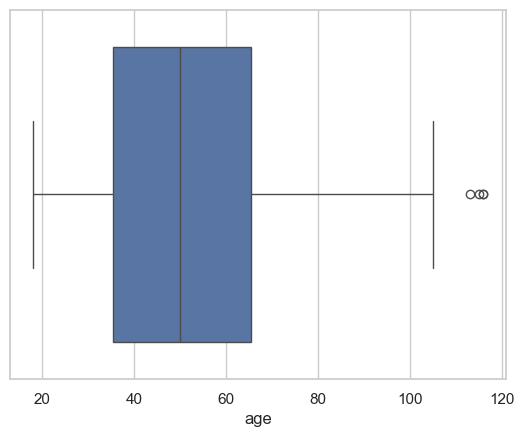

In [338]:
# Outlier analysis on 'age' column using boxplot

sorted_age_list = df['age'].sort_values().to_list()
print("sorted_age_list: ", sorted_age_list)
min_age = sorted_age_list[0]
Q1 = sorted_age_list[len(sorted_age_list) // 4]
median = sorted_age_list[len(sorted_age_list) // 2]
Q3 = sorted_age_list[len(sorted_age_list) * 3 // 4]
last_nan_index = 1
max_age = sorted_age_list[len(sorted_age_list) - last_nan_index]
while max_age != max_age:
    last_nan_index += 1
    max_age = sorted_age_list[len(sorted_age_list) - last_nan_index]
print("min: ", min_age, "Q1: ", Q1, "median: ", median, "Q3: ", Q3, "max: ", max_age)

IQR = Q3 - Q1
print("IQR: ", IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound: ", lower_bound, "upper_bound: ", upper_bound)

# outliers are the values that are less than lower_bound or greater than upper_bound
outliers = []
for i in range(len(sorted_age_list)):
    if sorted_age_list[i] < lower_bound or sorted_age_list[i] > upper_bound:
        outliers.append(sorted_age_list[i])
print("outliers: ", outliers)

# draw boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["age"])
plt.show()


sorted_height_list:  [5, 21, 57, 85, 99, 151, 152, 152, 154, 154, 155, 159, 161, 164, 166, 168, 168, 171, 175, 176, 176, 181, 182, 183, 185, 185, 187, 189, 196, 199, 200, 200, 207, 210, 211, 211, 211, 211, 211, 212, 212, 213, 213, 214, 214, 216, 217, 219, 292, 316]
min:  5 Q1:  161 median:  185 Q3:  211 max:  316
IQR:  50
lower_bound:  86.0 upper_bound:  286.0
outliers:  [5, 21, 57, 85, 292, 316]


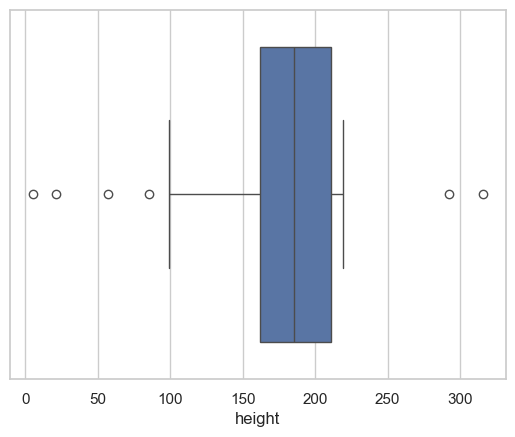

In [339]:
# Outlier analysis on 'height' column using boxplot

sorted_height_list = df['height'].sort_values().to_list()
print("sorted_height_list: ", sorted_height_list)
min_height = sorted_height_list[0]
Q1 = sorted_height_list[len(sorted_height_list) // 4]
median = sorted_height_list[len(sorted_height_list) // 2]
Q3 = sorted_height_list[len(sorted_height_list) * 3 // 4]
last_nan_index = 1
max_height = sorted_height_list[len(sorted_height_list) - last_nan_index]
while max_height != max_height:
    last_nan_index += 1
    max_height = sorted_height_list[len(sorted_height_list) - last_nan_index]
print("min: ", min_height, "Q1: ", Q1, "median: ", median, "Q3: ", Q3, "max: ", max_height)

IQR = Q3 - Q1
print("IQR: ", IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound: ", lower_bound, "upper_bound: ", upper_bound)

# outliers are the values that are less than lower_bound or greater than upper_bound
outliers = []
for i in range(len(sorted_height_list)):
    if sorted_height_list[i] < lower_bound or sorted_height_list[i] > upper_bound:
        outliers.append(sorted_height_list[i])
print("outliers: ", outliers)

# draw boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["height"])
plt.show()
